In [2]:
# Load the data
import pandas as pd
X = pd.read_csv(r'C:\Data\DeepLearningWorkshop\tree_class_feats.csv')
y = pd.read_csv(r'C:\Data\DeepLearningWorkshop\tree_class_target.csv')
"""
Split the dataset into training set and test set with an 80-20 ratio
"""
from sklearn.model_selection import train_test_split
seed=1
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                   random_state=seed)

In [3]:
# Define your model
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from tensorflow import random
np.random.seed(seed)
random.set_seed(seed)
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', \
                  input_dim=X_train.shape[1]))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [4]:
model_1.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
history = model_1.fit(X_train, y_train, \
                      validation_data=(X_test, y_test), \
                      epochs=300, batch_size=50, \
                      verbose=0, shuffle=False)

In [5]:
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

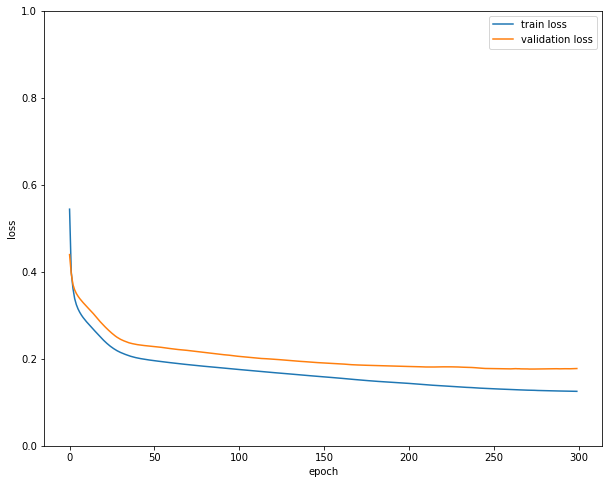

In [6]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], \
           loc='upper right')

In [7]:
#Define your model with early stopping on test error
from keras.callbacks import EarlyStopping
np.random.seed(seed)
random.set_seed(seed)
model_2 = Sequential()
model_2.add(Dense(16, activation='relu', \
                  input_dim=X_train.shape[1]))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
"""
Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
"""
model_2.compile(optimizer='sgd', loss='binary_crossentropy')
# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', \
                            mode='min')
# train the model
history=model_2.fit(X_train, y_train, \
                    validation_data=(X_test, y_test), \
                    epochs=300, batch_size=50, \
                    callbacks=[es_callback], verbose=0, \
                    shuffle=False)

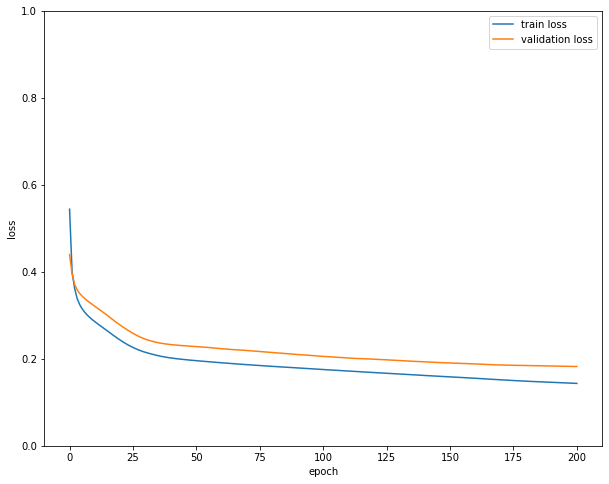

In [8]:
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], \
           loc='upper right')